سوال 3- بخش د قسمت cpu

In [ ]:
import numpy as np
from scipy.ndimage import uniform_filter
import time

width, height = 1024, 1024
input_image = np.random.randint(0, 256, (height, width), dtype=np.uint8)

def averaging_filter_cpu(image, filter_size=3):
    return uniform_filter(image, size=filter_size)

start_time = time.time()
output_cpu = averaging_filter_cpu(input_image, filter_size=3)
cpu_time = time.time() - start_time

print(f"زمان پردازش CPU: {cpu_time:.4f} ثانیه")


زمان پردازش CPU: 0.0202 ثانیه


gpu

In [ ]:
import torch
import torch.nn.functional as F
import numpy as np
import time
# ساخت تصویر تصادفی برای تست
width, height = 1024, 1024
input_image = np.random.randint(0, 256, (1, 1, height, width)).astype(np.float32)  # شکل (1, 1, height, width) برای PyTorch
# تبدیل تصویر به تنسور PyTorch
input_tensor_cpu = torch.from_numpy(input_image)
# تعریف فیلتر میانگین
filter_size = 3
average_filter = torch.ones(1, 1, filter_size, filter_size) / (filter_size * filter_size)
# اجرای فیلتر در CPU
start_time = time.time()
output_cpu = F.conv2d(input_tensor_cpu, average_filter, padding=filter_size // 2)
cpu_time = time.time() - start_time
print(f"زمان پردازش CPU: {cpu_time:.4f} ثانیه")
# انتقال داده‌ها به GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
input_tensor_gpu = input_tensor_cpu.to(device)
average_filter_gpu = average_filter.to(device)
# اجرای فیلتر در GPU
start_time = time.time()
output_gpu = F.conv2d(input_tensor_gpu, average_filter_gpu, padding=filter_size // 2)
gpu_time = time.time() - start_time
print(f"زمان پردازش GPU: {gpu_time:.4f} ثانیه")
# انتقال نتیجه به CPU
output_gpu = output_gpu.to("cpu").detach().numpy()

زمان پردازش CPU: 0.0345 ثانیه
زمان پردازش GPU: 0.0319 ثانیه


In [ ]:
#question1 read the plate:
!apt-get install tesseract-ocr
!pip install pytesseract opencv-python


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 49 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 1s (3,988 kB/s)
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 123622 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-

In [19]:
import numpy as np
from PIL import Image, ImageOps
import cv2
from google.colab.patches import cv2_imshow

In [20]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
# Install Tesseract OCR
!apt-get install tesseract-ocr -y

# Install pytesseract
!pip install pytesseract

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [35]:
import cv2
import numpy as np
from skimage.filters import threshold_multiotsu
import pytesseract
from google.colab.patches import cv2_imshow

# Load the image
image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/computer vision/car.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply multi-thresholding using multi-Otsu
thresholds = threshold_multiotsu(gray, classes=3)
regions = np.digitize(gray, bins=thresholds)

# Map each region to intensity values (0, 127, 255)
output_image = np.where(regions == 0, 0,
                np.where(regions == 1, 127, 255)).astype(np.uint8)

# Extract the license plate region based on threshold values
plate_region = cv2.inRange(output_image, 127, 255)

# Find contours of the potential license plate
contours, _ = cv2.findContours(plate_region, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

License Plate Text: MH 2GEE 7602


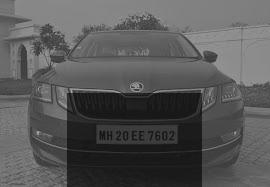

License Plate Text: =


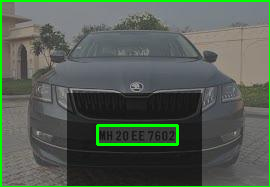

In [41]:
# Loop over contours to find the license plate
for contour in contours:
    area = cv2.contourArea(contour)
    if area > 500:  # Adjust this threshold based on your image
        x, y, w, h = cv2.boundingRect(contour)
        plate = gray[y:y+h, x:x+w]
        # Draw rectangle around the detected plate
        cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)
        # Display the detected license plate
        cv2_imshow(plate)
        # Apply OCR on the detected license plate region
        plate_text =  (plate, config='--psm 8')
        print("License Plate Text:", plate_text.strip())  # Print the detected text
# Display the final image with detected plate area
cv2_imshow(image)

In [1]:
#question2 count the stars
import numpy as np
from PIL import Image, ImageOps
import cv2
from google.colab.patches import cv2_imshow

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
# Specify the file path
file_path = '/content/drive/MyDrive/Colab Notebooks/computer vision/input1.txt'

# Open the file
with open(file_path, 'r') as file:
    first_line = file.readline()

width = int(first_line.rsplit(' ')[0])
height = int(first_line.rsplit(' ')[1])
expected_output = int(first_line.rsplit(' ')[2])

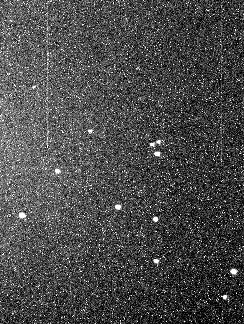

In [5]:
data = np.genfromtxt(file_path, skip_header=1, dtype=str)
a = data[:, 1::3]
a = np.char.strip(a, ',')
a = a.astype(np.uint8)
cv2_imshow(a)

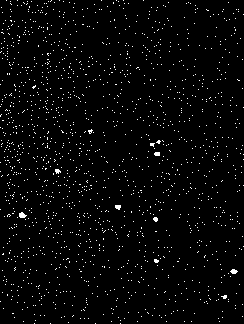

In [7]:
# the image is polluted with salt and pepper noise
# to clarify the image , first we need to turn it to a black and with image
# then we turn it to a grayscale image
# later with median filter we will fully remove the noises from the image

threshold = 200
output_image = np.copy(a)

# Apply the threshold
output_image[a < threshold] = 0
output_image[a > threshold] = 255

# Create an output image from the NumPy array
output_image = Image.fromarray(output_image)
output_image.save('/content/drive/MyDrive/Colab Notebooks/computer vision/image.jpg')
output_image

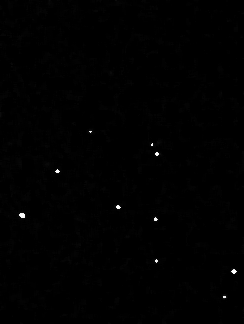

In [9]:
image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/computer vision/image.jpg')

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# we could use max and min filter but median filter is more comprehensive
# Apply the median filter to remove noise
# set the kernel to its max value , if we choose a smaller value it might result in more noise
filtered_image = cv2.medianBlur(gray, 5)

# Display the filtered image
cv2_imshow(filtered_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [10]:
_, binary = cv2.threshold(filtered_image, 200, 255, cv2.THRESH_BINARY)
# Find contours in the image
contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# Filter contours based on area to count the white dots
min_dot_area = 5 # Adjust this value as needed
white_dots = [contour for contour in contours if cv2.contourArea(contour) >= min_dot_area]

# Draw the white dots on a copy of the original image
result_image = filtered_image.copy()

In [11]:
for dot in white_dots:
    M = cv2.moments(dot)
    if M["m00"] != 0:
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
        print(f"Center of Identified Star: ({cX}, {cY})")

Center of Identified Star: (233, 271)
Center of Identified Star: (155, 218)
Center of Identified Star: (21, 214)
Center of Identified Star: (117, 206)
Center of Identified Star: (57, 170)
Center of Identified Star: (156, 153)


Number of white dots: 6


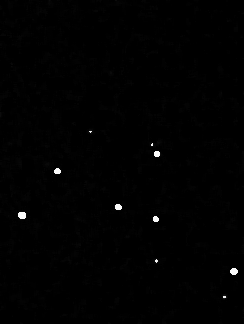

In [12]:
# hugh white dots show the stars identified by our code
cv2.drawContours(result_image, white_dots, -1, (250, 250, 0), 2)

# Print the number of white dots
print(f"Number of white dots: {len(white_dots)}")

# Show the result image with contours
cv2_imshow(result_image)
cv2.waitKey(0)
cv2.destroyAllWindows()